
🌍 CLIMATE MODELLING MACHINE LEARNING PROJECT
Goal: Predict Climate Variable using Historical Climate Data



100%|██████████| 791k/791k [00:00<00:00, 51.8MB/s]

Extracting files...
Dataset Path: /root/.cache/kagglehub/datasets/goyaladi/climate-insights-dataset/versions/4

Loading Dataset Files...
CSV Files Found: ['/root/.cache/kagglehub/datasets/goyaladi/climate-insights-dataset/versions/4/climate_change_data.csv']

Dataset Loaded Successfully
                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600 

        Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664  


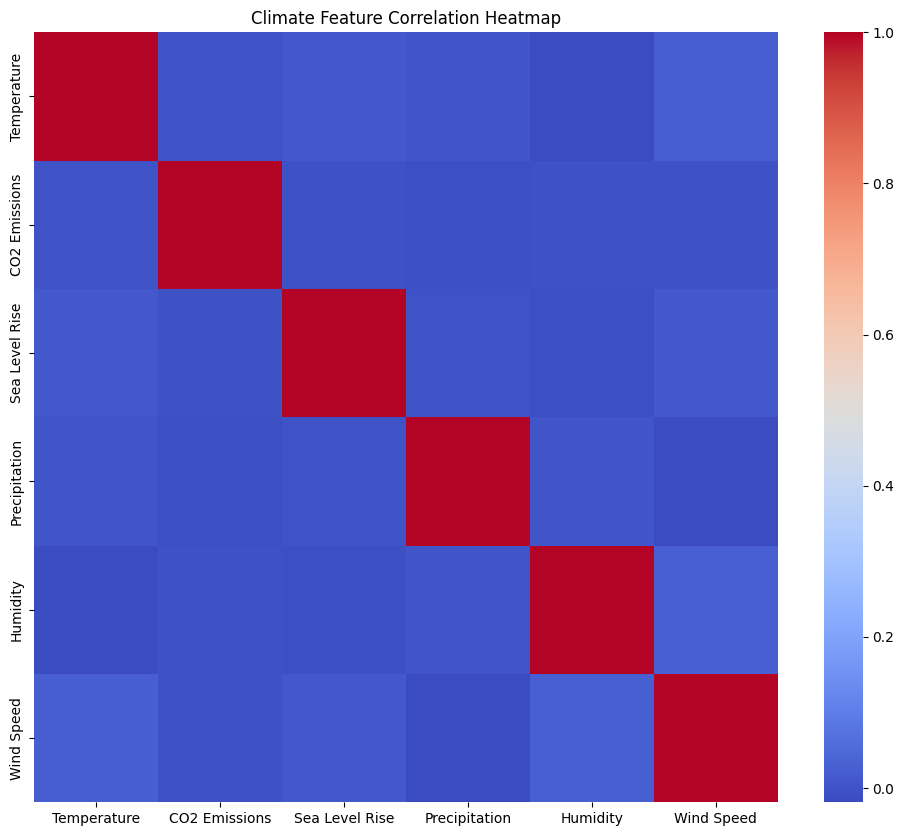

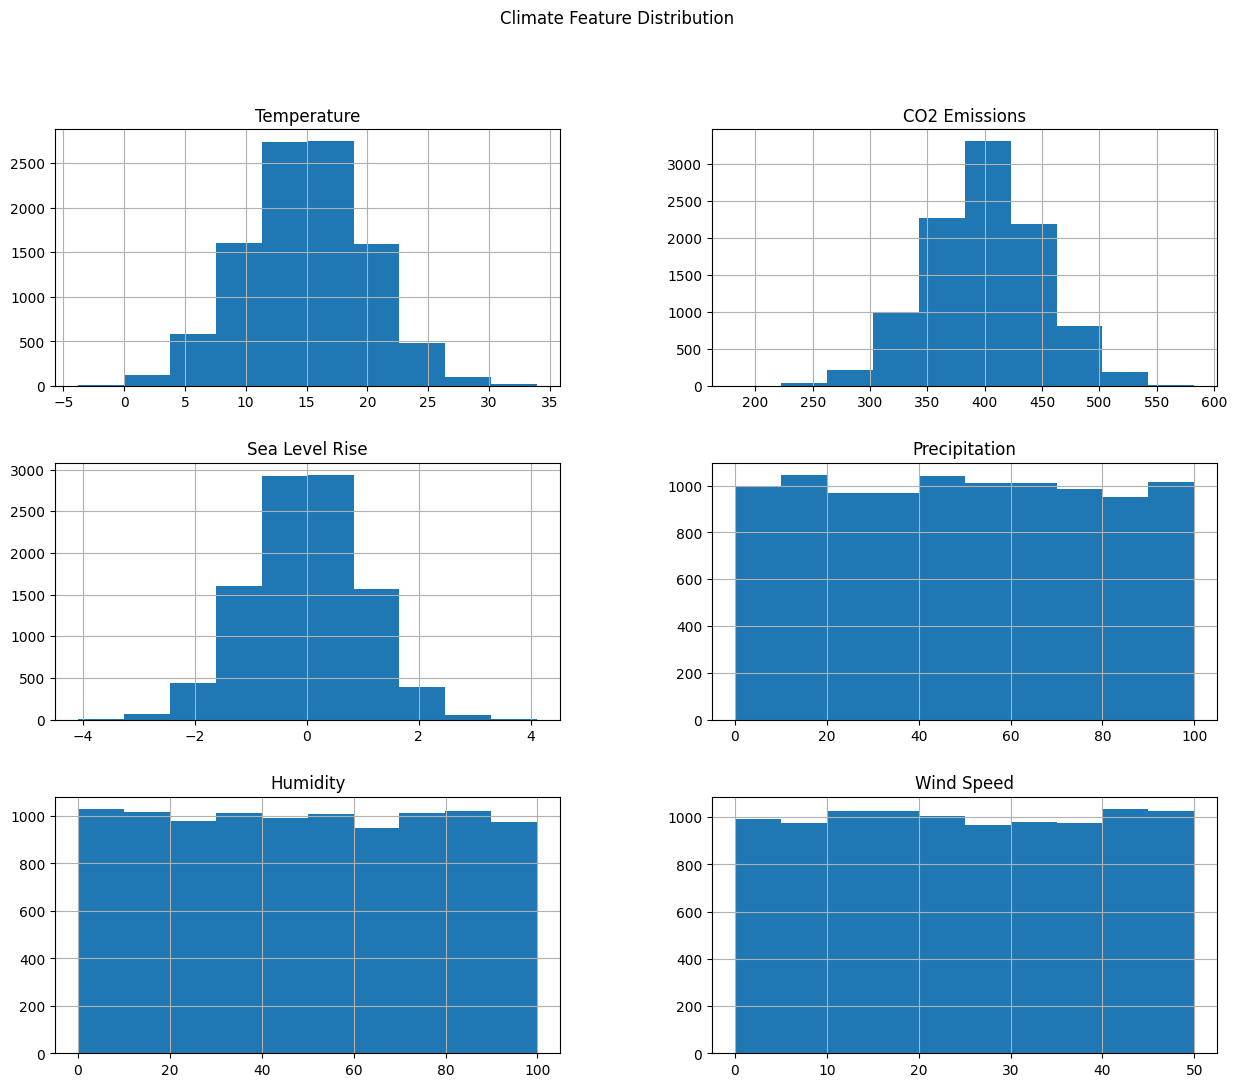

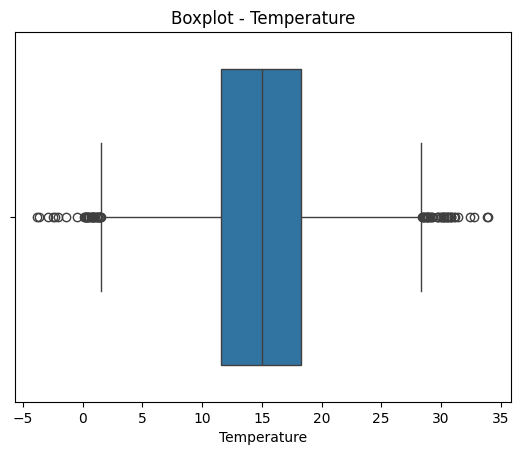

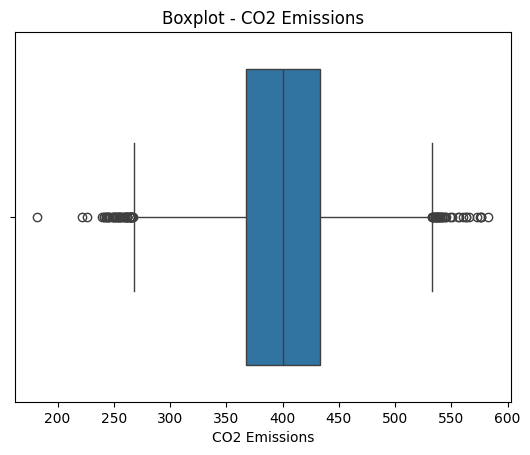

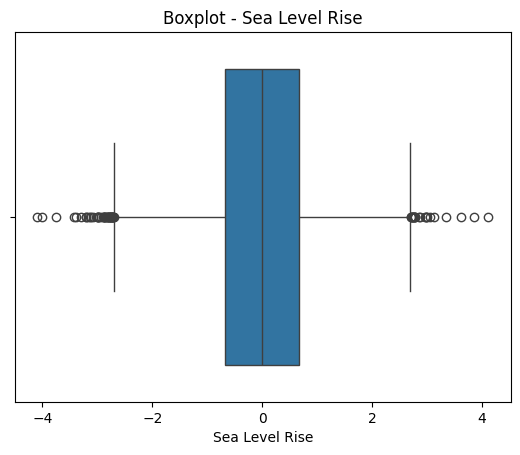

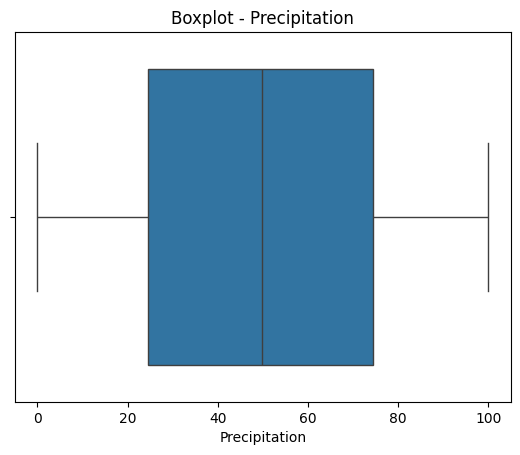

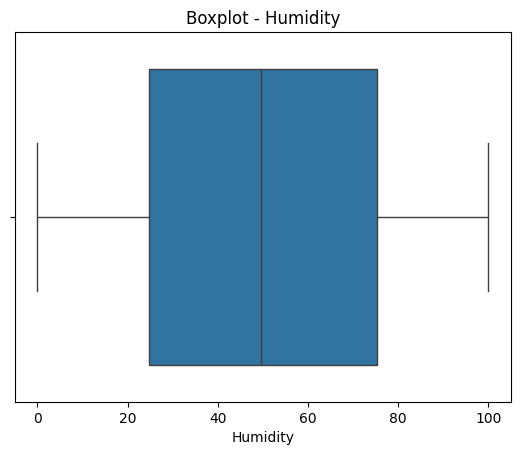

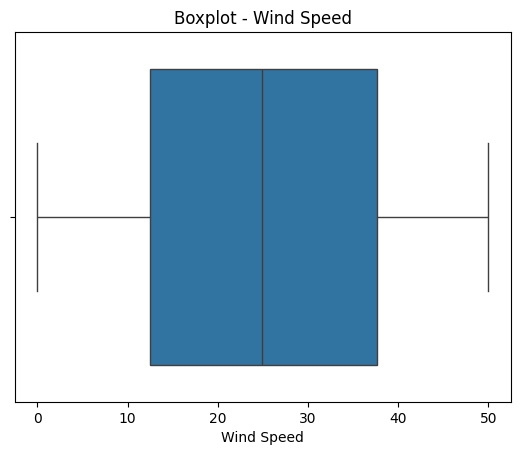

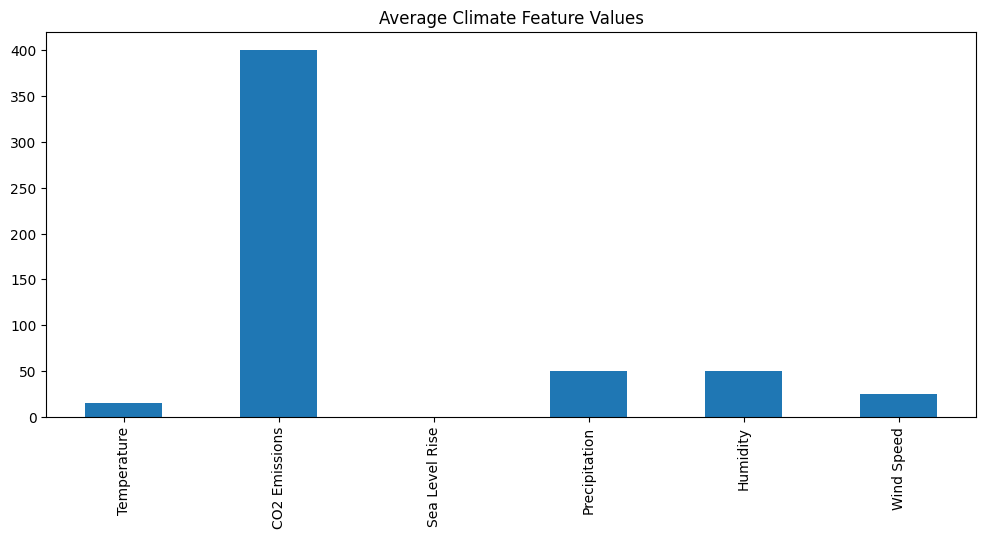


Preprocessing Data...
Target Variable: Wind Speed


ValueError: could not convert string to float: '2000-01-01 00:00:00.000000000'

In [ ]:
# =========================================================
# CLIMATE MODELLING - FULL MACHINE LEARNING PROJECT
# =========================================================

# =========================================================
# STEP 1 — IMPORT LIBRARIES
# =========================================================

import os
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import joblib


# =========================================================
# STEP 2 — DEFINE PROBLEM
# =========================================================
print("\n🌍 CLIMATE MODELLING MACHINE LEARNING PROJECT")
print("Goal: Predict Climate Variable using Historical Climate Data")


# =========================================================
# STEP 3 — DATA COLLECTION
# =========================================================

print("\nDownloading Dataset from Kaggle...")

dataset_path = kagglehub.dataset_download(
    "goyaladi/climate-insights-dataset"
)

print("Dataset Path:", dataset_path)


# =========================================================
# STEP 4 — LOAD DATASET
# =========================================================

print("\nLoading Dataset Files...")

csv_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print("CSV Files Found:", csv_files)

df = pd.read_csv(csv_files[0])

print("\nDataset Loaded Successfully")
print(df.head())
print("\nDataset Shape:", df.shape)


# =========================================================
# STEP 5 — DATA UNDERSTANDING / EDA
# =========================================================

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


# =========================================================
# STEP 6 — DATA VISUALIZATION (EDA)
# =========================================================

# ----- Correlation Heatmap -----
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),
            annot=False,
            cmap="coolwarm")
plt.title("Climate Feature Correlation Heatmap")
plt.show()


# ----- Histograms -----
df.hist(figsize=(15,12))
plt.suptitle("Climate Feature Distribution")
plt.show()


# ----- Boxplots -----
for col in df.select_dtypes(include=np.number).columns[:6]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


# ----- Bar Graph (Sample Feature Means) -----
df.mean(numeric_only=True).plot(kind="bar", figsize=(12,5))
plt.title("Average Climate Feature Values")
plt.show()


# =========================================================
# STEP 7 — DATA PREPROCESSING
# =========================================================

print("\nPreprocessing Data...")

# Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)


# =========================================================
# STEP 8 — TARGET VARIABLE SELECTION
# =========================================================

# CHANGE THIS BASED ON DATASET COLUMN
TARGET_COLUMN = df.columns[-1]  # Default last column

print("Target Variable:", TARGET_COLUMN)

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


# =========================================================
# STEP 9 — FEATURE SCALING
# =========================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================================================
# STEP 10 — TRAIN TEST SPLIT
# =========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)


# =========================================================
# STEP 11 — MODEL SELECTION
# =========================================================

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


# =========================================================
# STEP 12 — MODEL TRAINING
# =========================================================

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "R2": r2_score(y_test, pred)
    }


# =========================================================
# STEP 13 — MODEL COMPARISON VISUALIZATION
# =========================================================

results_df = pd.DataFrame(results).T

print("\nModel Performance:")
print(results_df)

results_df.plot(kind="bar", figsize=(10,5))
plt.title("Model Performance Comparison")
plt.show()


# =========================================================
# STEP 14 — HYPERPARAMETER TUNING
# =========================================================

print("\nOptimizing Random Forest...")

param_grid = {
    "n_estimators":[100,200],
    "max_depth":[5,10,None]
}

grid = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=3
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)


# =========================================================
# STEP 15 — FINAL MODEL EVALUATION
# =========================================================

final_pred = best_model.predict(X_test)

print("\nFinal Model Metrics")
print("MAE:", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
print("R2 Score:", r2_score(y_test, final_pred))


# ----- Actual vs Predicted Plot -----
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_pred)
plt.xlabel("Actual Climate Value")
plt.ylabel("Predicted Climate Value")
plt.title("Actual vs Predicted")
plt.show()


# =========================================================
# STEP 16 — FEATURE IMPORTANCE
# =========================================================

importance = best_model.feature_importances_

feat_importance = pd.Series(
    importance,
    index=X.columns
).sort_values(ascending=False)

feat_importance.head(15).plot(kind="bar")
plt.title("Top Climate Feature Importance")
plt.show()


# =========================================================
# STEP 17 — MODEL DEPLOYMENT (SAVE)
# =========================================================

joblib.dump(best_model, "climate_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel Saved Successfully!")



🌍 CLIMATE MODELLING MACHINE LEARNING PROJECT
Goal: Predict Climate Variable using Historical Climate Data



100%|██████████| 791k/791k [00:00<00:00, 108MB/s]

Extracting files...
Dataset Path: /root/.cache/kagglehub/datasets/goyaladi/climate-insights-dataset/versions/4

Loading Dataset Files...
CSV Files Found: ['/root/.cache/kagglehub/datasets/goyaladi/climate-insights-dataset/versions/4/climate_change_data.csv']

Dataset Loaded Successfully
                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600 

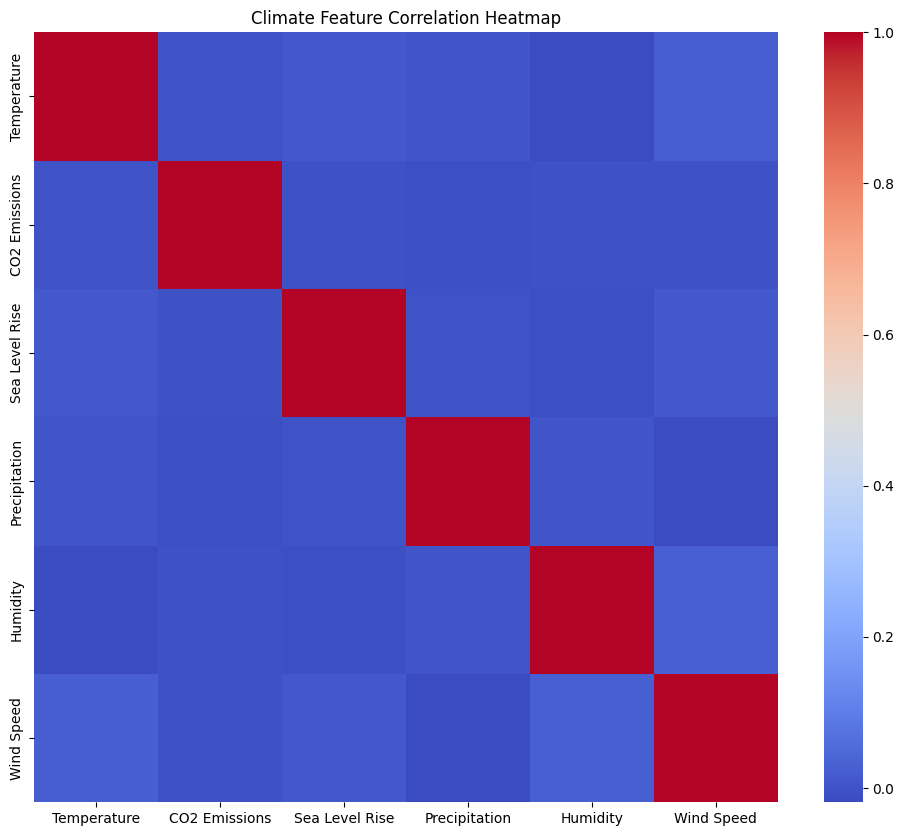

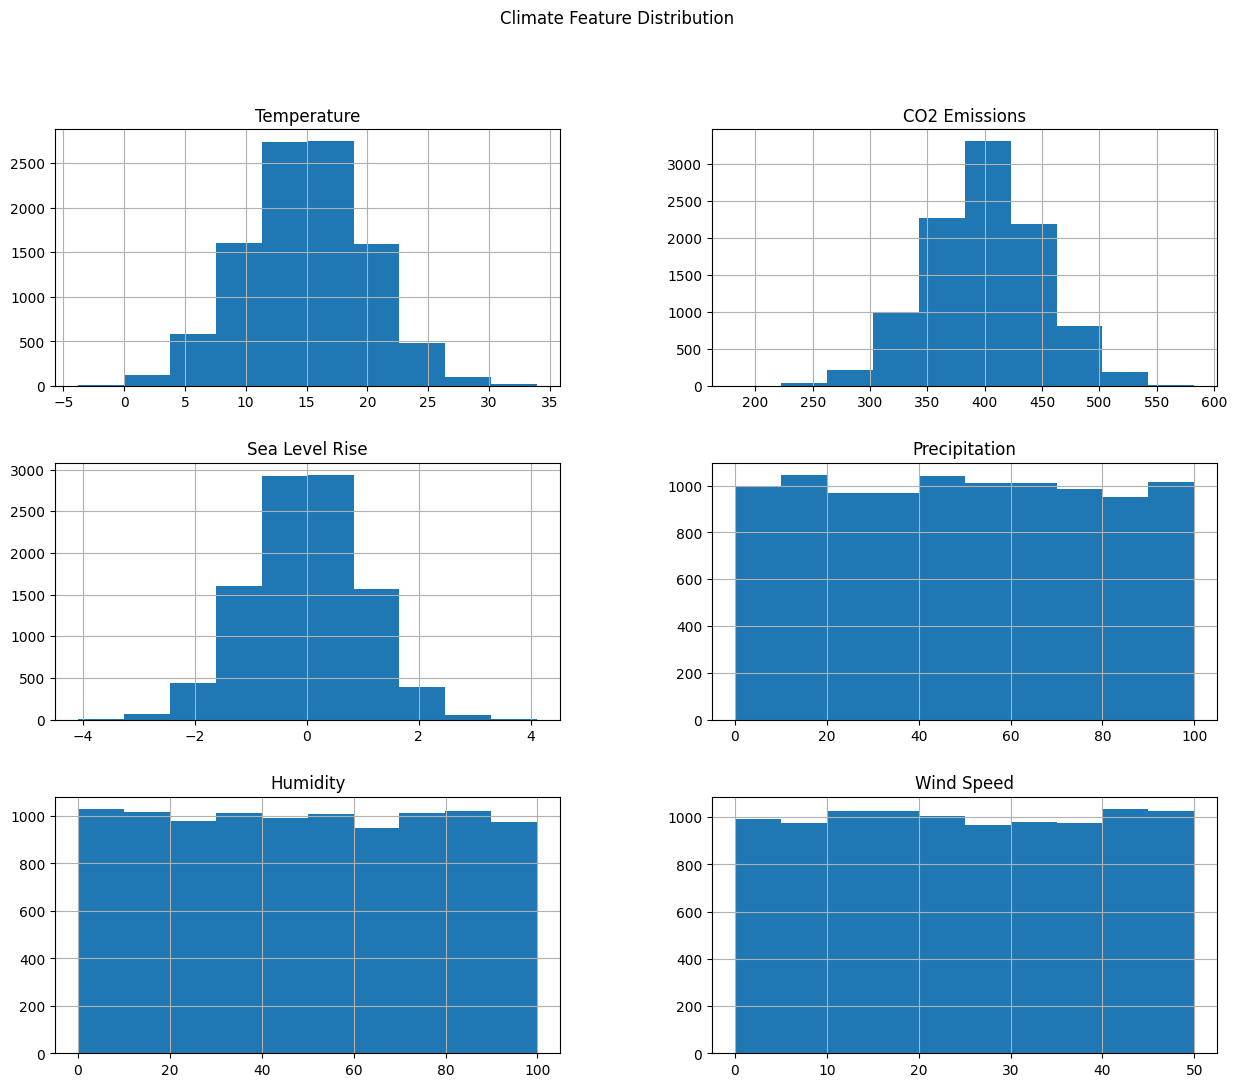

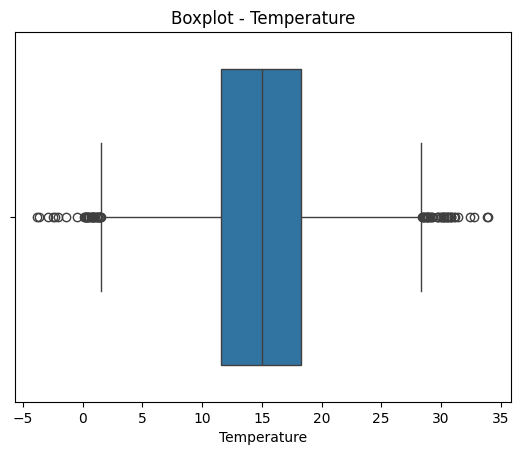

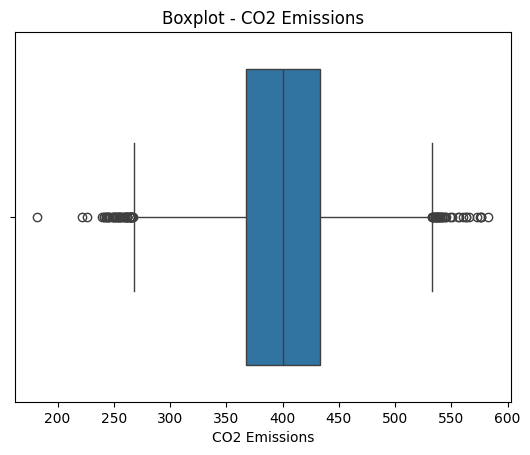

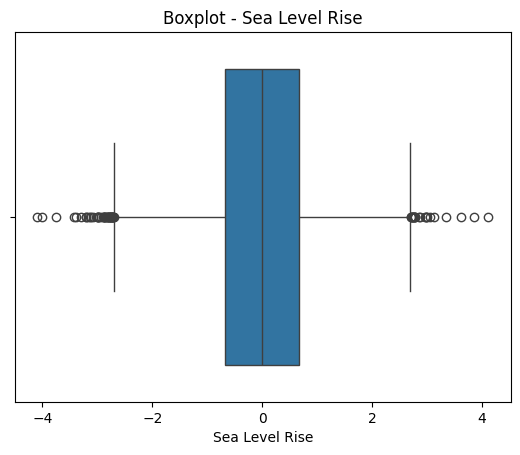

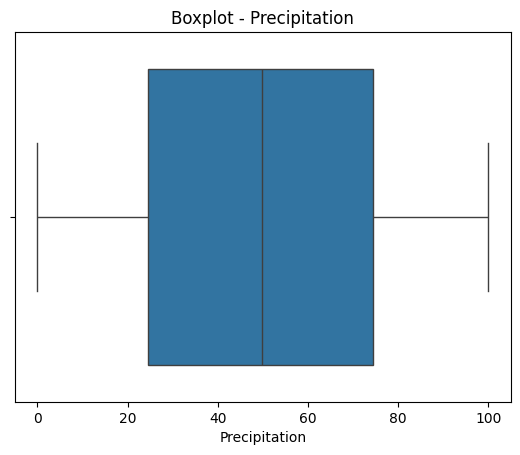

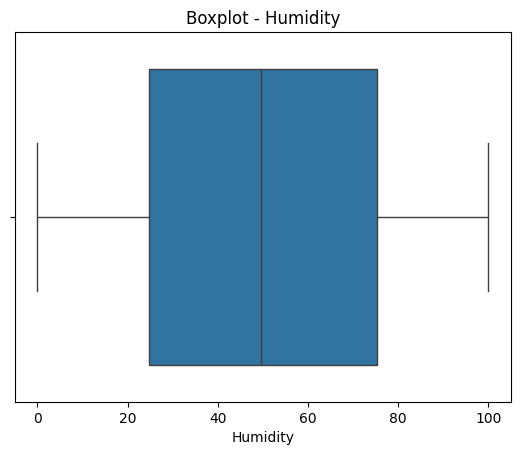

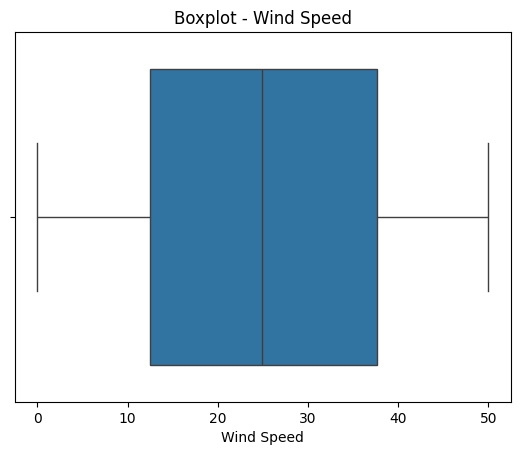

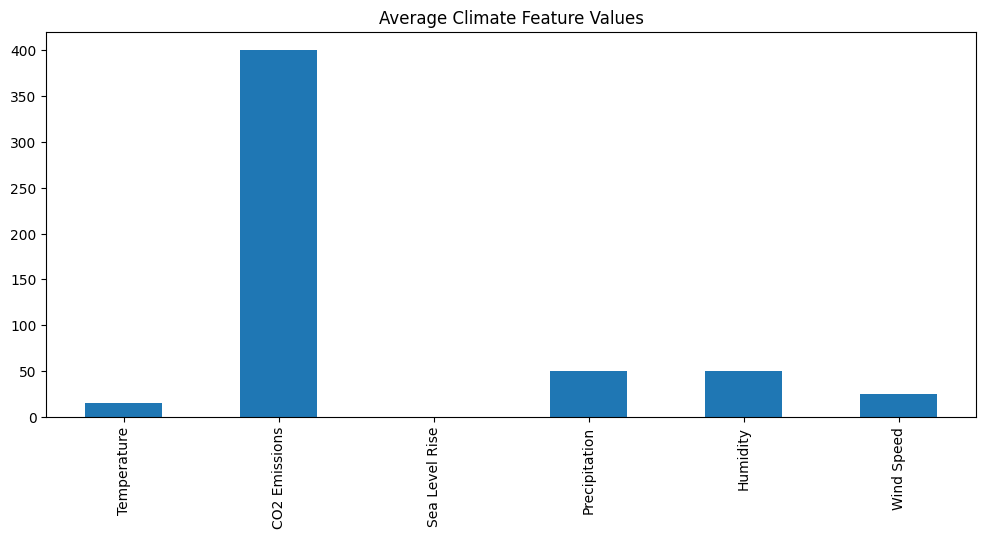


Preprocessing Data...
Converted datetime column: Date
Converted datetime column: Temperature
Converted datetime column: CO2 Emissions
Converted datetime column: Sea Level Rise
Converted datetime column: Precipitation
Converted datetime column: Humidity
Converted datetime column: Wind Speed
Categorical Columns: ['Location', 'Country']
Target Variable: Country_Zimbabwe
Train Size: (8000, 8025)
Test Size: (2000, 8025)

Training Linear Regression...

Model Performance:
                        MAE      RMSE       R2
Linear Regression  0.029379  0.059218 -0.17245


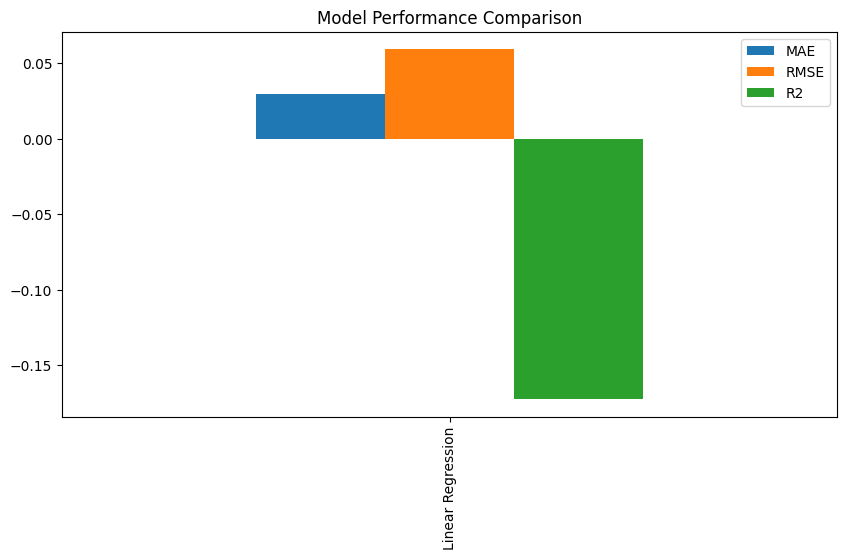


Optimizing Random Forest...


In [ ]:
# =========================================================
# CLIMATE MODELLING - FULL MACHINE LEARNING PROJECT (COLAB READY)
# =========================================================

# =========================================================
# STEP 0 — INSTALL REQUIREMENTS (COLAB ONLY)
# =========================================================
!pip install kagglehub --quiet

# =========================================================
# STEP 1 — IMPORT LIBRARIES
# =========================================================

import os
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import joblib


# =========================================================
# STEP 2 — DEFINE PROBLEM
# =========================================================
print("\n🌍 CLIMATE MODELLING MACHINE LEARNING PROJECT")
print("Goal: Predict Climate Variable using Historical Climate Data")


# =========================================================
# STEP 3 — DATA COLLECTION
# =========================================================

print("\nDownloading Dataset from Kaggle...")

dataset_path = kagglehub.dataset_download(
    "goyaladi/climate-insights-dataset"
)

print("Dataset Path:", dataset_path)


# =========================================================
# STEP 4 — LOAD DATASET
# =========================================================

print("\nLoading Dataset Files...")

csv_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print("CSV Files Found:", csv_files)

df = pd.read_csv(csv_files[0])

print("\nDataset Loaded Successfully")
print(df.head())
print("\nDataset Shape:", df.shape)


# =========================================================
# STEP 5 — DATA UNDERSTANDING / EDA
# =========================================================

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


# =========================================================
# STEP 6 — DATA VISUALIZATION (EDA)
# =========================================================

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Climate Feature Correlation Heatmap")
plt.show()

# Histogram Distribution
df.hist(figsize=(15,12))
plt.suptitle("Climate Feature Distribution")
plt.show()

# Boxplots
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols[:6]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

# Feature Mean Bar Graph
df.mean(numeric_only=True).plot(kind="bar", figsize=(12,5))
plt.title("Average Climate Feature Values")
plt.show()


# =========================================================
# STEP 7 — DATA PREPROCESSING (IMPORTANT FIX ADDED)
# =========================================================

print("\nPreprocessing Data...")

# -------- DATETIME HANDLING --------
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        df[col+"_year"] = df[col].dt.year
        df[col+"_month"] = df[col].dt.month
        df[col+"_day"] = df[col].dt.day
        df.drop(columns=[col], inplace=True)
        print("Converted datetime column:", col)
    except:
        pass


# -------- CATEGORICAL ENCODING --------
cat_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns:", list(cat_cols))

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# -------- HANDLE MISSING VALUES --------
df.fillna(df.mean(numeric_only=True), inplace=True)


# =========================================================
# STEP 8 — TARGET VARIABLE SELECTION
# =========================================================

TARGET_COLUMN = df.columns[-1]
print("Target Variable:", TARGET_COLUMN)

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


# =========================================================
# STEP 9 — FEATURE SCALING
# =========================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================================================
# STEP 10 — TRAIN TEST SPLIT
# =========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)


# =========================================================
# STEP 11 — MODEL SELECTION
# =========================================================

models = {
    "Linear Regression": LinearRegression()
    # "Random Forest": RandomForestRegressor(),
    # "Gradient Boosting": GradientBoostingRegressor()
}


# =========================================================
# STEP 12 — MODEL TRAINING
# =========================================================

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "R2": r2_score(y_test, pred)
    }


# =========================================================
# STEP 13 — MODEL COMPARISON VISUALIZATION
# =========================================================

results_df = pd.DataFrame(results).T

print("\nModel Performance:")
print(results_df)

results_df.plot(kind="bar", figsize=(10,5))
plt.title("Model Performance Comparison")
plt.show()


# =========================================================
# STEP 14 — HYPERPARAMETER TUNING
# =========================================================

print("\nOptimizing Random Forest...")

param_grid = {
    "n_estimators":[100,200],
    "max_depth":[5,10,None]
}

grid = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)


# =========================================================
# STEP 15 — FINAL MODEL EVALUATION
# =========================================================

final_pred = best_model.predict(X_test)

print("\nFinal Model Metrics")
print("MAE:", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
print("R2 Score:", r2_score(y_test, final_pred))


# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_pred)
plt.xlabel("Actual Climate Value")
plt.ylabel("Predicted Climate Value")
plt.title("Actual vs Predicted")
plt.show()


# =========================================================
# STEP 16 — FEATURE IMPORTANCE
# =========================================================

importance = best_model.feature_importances_

feat_importance = pd.Series(
    importance,
    index=X.columns
).sort_values(ascending=False)

feat_importance.head(15).plot(kind="bar")
plt.title("Top Climate Feature Importance")
plt.show()


# =========================================================
# STEP 17 — MODEL DEPLOYMENT (SAVE)
# =========================================================

joblib.dump(best_model, "climate_model.pkl")
joblib.dump(scaler, "climate_scaler.pkl")

print("\n✅ Model Saved Successfully!")



🌍 CLIMATE MODELLING USING OPTIMIZED LINEAR REGRESSION

Using Colab cache for faster access to the 'climate-insights-dataset' dataset.
Dataset Path: /kaggle/input/climate-insights-dataset

Dataset Loaded
                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    1

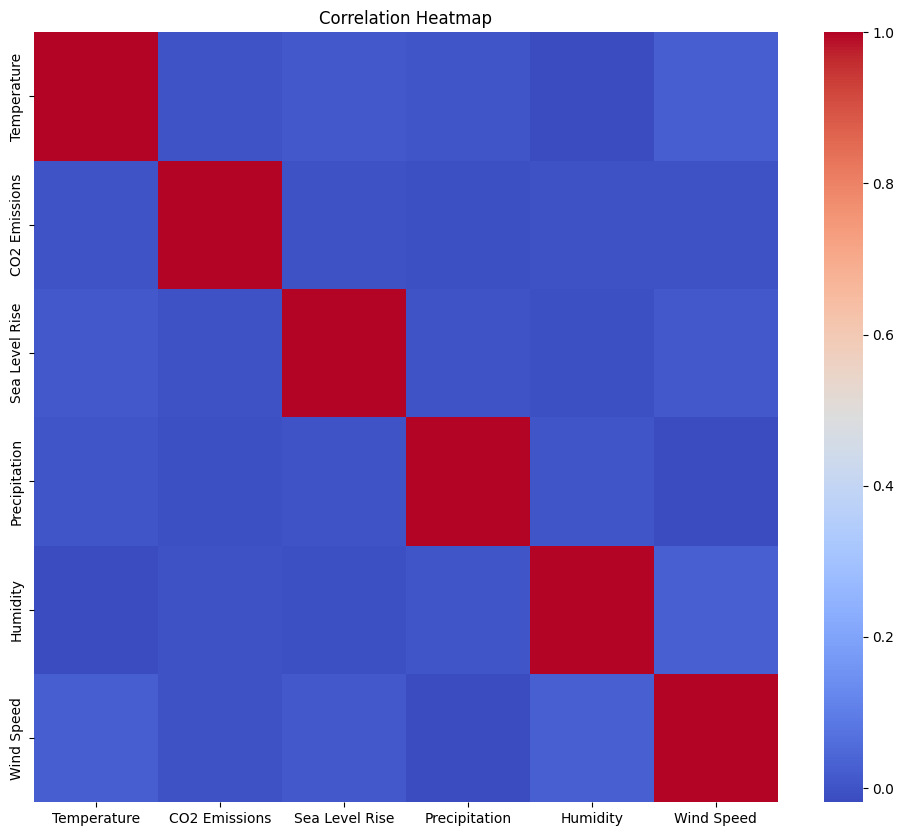

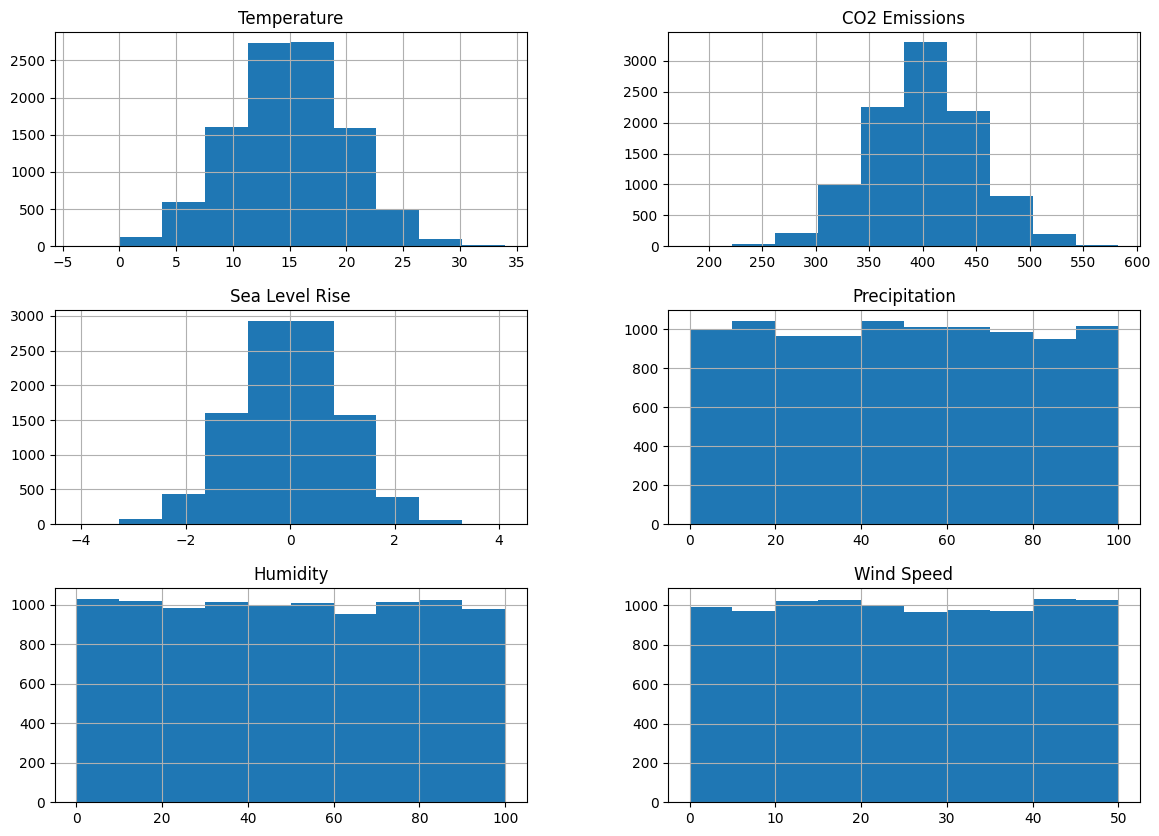


Preprocessing Data...
Converted datetime: Date
Converted datetime: Temperature
Converted datetime: CO2 Emissions
Converted datetime: Sea Level Rise
Converted datetime: Precipitation
Converted datetime: Humidity
Converted datetime: Wind Speed
Target Column: Country_Zimbabwe

Optimizing Linear Models...


KeyboardInterrupt: 

In [ ]:
# =========================================================
# CLIMATE MODELLING - LINEAR REGRESSION OPTIMIZED (FAST VERSION)
# =========================================================

# =========================================================
# STEP 0 — INSTALL (COLAB)
# =========================================================
!pip install kagglehub --quiet

# =========================================================
# STEP 1 — IMPORT LIBRARIES
# =========================================================

import os
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression, Ridge, Lasso

import joblib


# =========================================================
# STEP 2 — DEFINE PROBLEM
# =========================================================
print("\n🌍 CLIMATE MODELLING USING OPTIMIZED LINEAR REGRESSION")


# =========================================================
# STEP 3 — DATA COLLECTION
# =========================================================

print("\nDownloading Dataset from Kaggle...")

dataset_path = kagglehub.dataset_download(
    "goyaladi/climate-insights-dataset"
)

print("Dataset Path:", dataset_path)


# =========================================================
# STEP 4 — LOAD DATASET
# =========================================================

csv_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

df = pd.read_csv(csv_files[0])

print("\nDataset Loaded")
print(df.head())
print("Shape:", df.shape)


# =========================================================
# STEP 5 — EDA
# =========================================================

print("\nMissing Values:\n", df.isnull().sum())

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histogram
df.hist(figsize=(14,10))
plt.show()


# =========================================================
# STEP 6 — PREPROCESSING (IMPORTANT FOR CLIMATE DATA)
# =========================================================

print("\nPreprocessing Data...")

# ---- Convert Date Columns ----
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        df[col+"_year"] = df[col].dt.year
        df[col+"_month"] = df[col].dt.month
        df[col+"_day"] = df[col].dt.day
        df.drop(columns=[col], inplace=True)
        print("Converted datetime:", col)
    except:
        pass


# ---- Encode Categorical ----
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# ---- Fill Missing ----
df.fillna(df.mean(numeric_only=True), inplace=True)


# =========================================================
# STEP 7 — TARGET SELECTION
# =========================================================

TARGET_COLUMN = df.columns[-1]

print("Target Column:", TARGET_COLUMN)

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


# =========================================================
# STEP 8 — SCALING
# =========================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================================================
# STEP 9 — TRAIN TEST SPLIT
# =========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


# =========================================================
# STEP 10 — LINEAR REGRESSION OPTIMIZATION
# =========================================================

print("\nOptimizing Linear Models...")

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

param_grid = {
    "Ridge": {"alpha":[0.01,0.1,1,10]},
    "Lasso": {"alpha":[0.01,0.1,1,10]}
}

best_models = {}
results = {}

# ---- Linear (No Hyperparameters) ----
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

results["Linear"] = r2_score(y_test, pred)
best_models["Linear"] = lin_model


# ---- Ridge + Lasso Grid Search ----
for name in ["Ridge","Lasso"]:

    grid = GridSearchCV(
        models[name],
        param_grid[name],
        cv=3,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    pred = best_models[name].predict(X_test)
    results[name] = r2_score(y_test, pred)

    print(f"{name} Best Param:", grid.best_params_)


# =========================================================
# STEP 11 — MODEL COMPARISON
# =========================================================

results_df = pd.DataFrame(results, index=["R2 Score"]).T

print("\nModel Comparison:\n", results_df)

results_df.plot(kind="bar", legend=False)
plt.title("Linear Model Comparison")
plt.show()


# =========================================================
# STEP 12 — FINAL MODEL
# =========================================================

best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]

print("\nBest Model:", best_model_name)


# =========================================================
# STEP 13 — FINAL EVALUATION
# =========================================================

final_pred = best_model.predict(X_test)

print("\nFinal Metrics")
print("MAE:", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
print("R2:", r2_score(y_test, final_pred))


# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# =========================================================
# STEP 14 — SAVE MODEL
# =========================================================

joblib.dump(best_model, "climate_linear_model.pkl")
joblib.dump(scaler, "climate_scaler.pkl")

print("\n✅ Model Saved Successfully")



🌍 CLIMATE MODELLING USING OPTIMIZED LINEAR REGRESSION!

Dataset Path: /root/.cache/kagglehub/datasets/goyaladi/climate-insights-dataset/versions/4

Dataset Loaded
                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757 

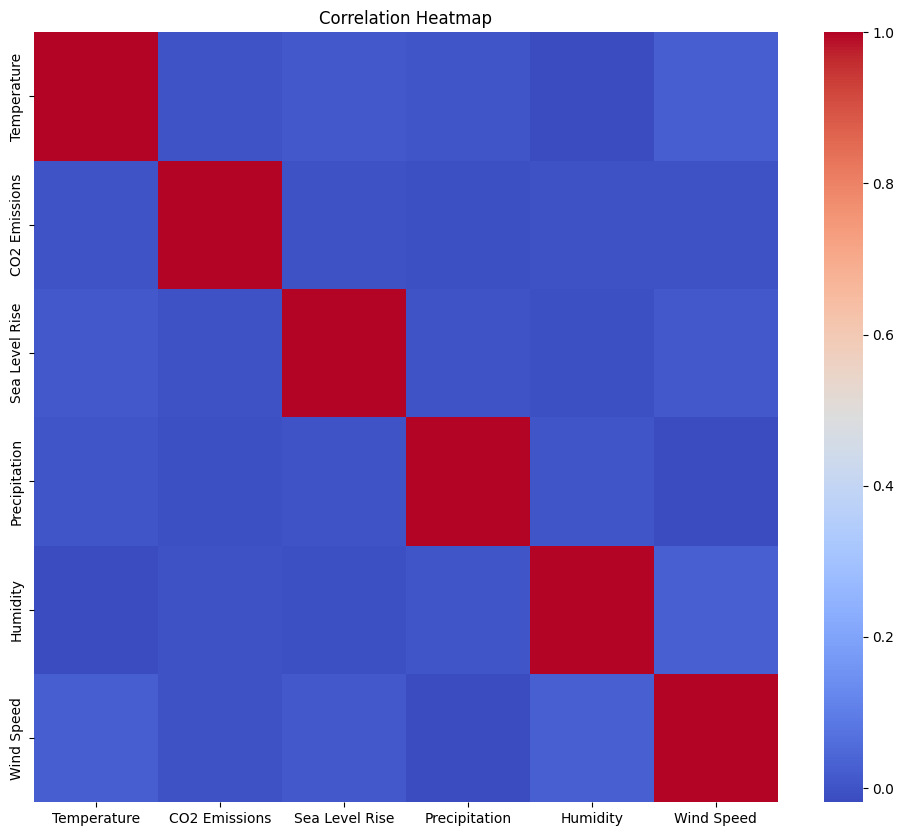

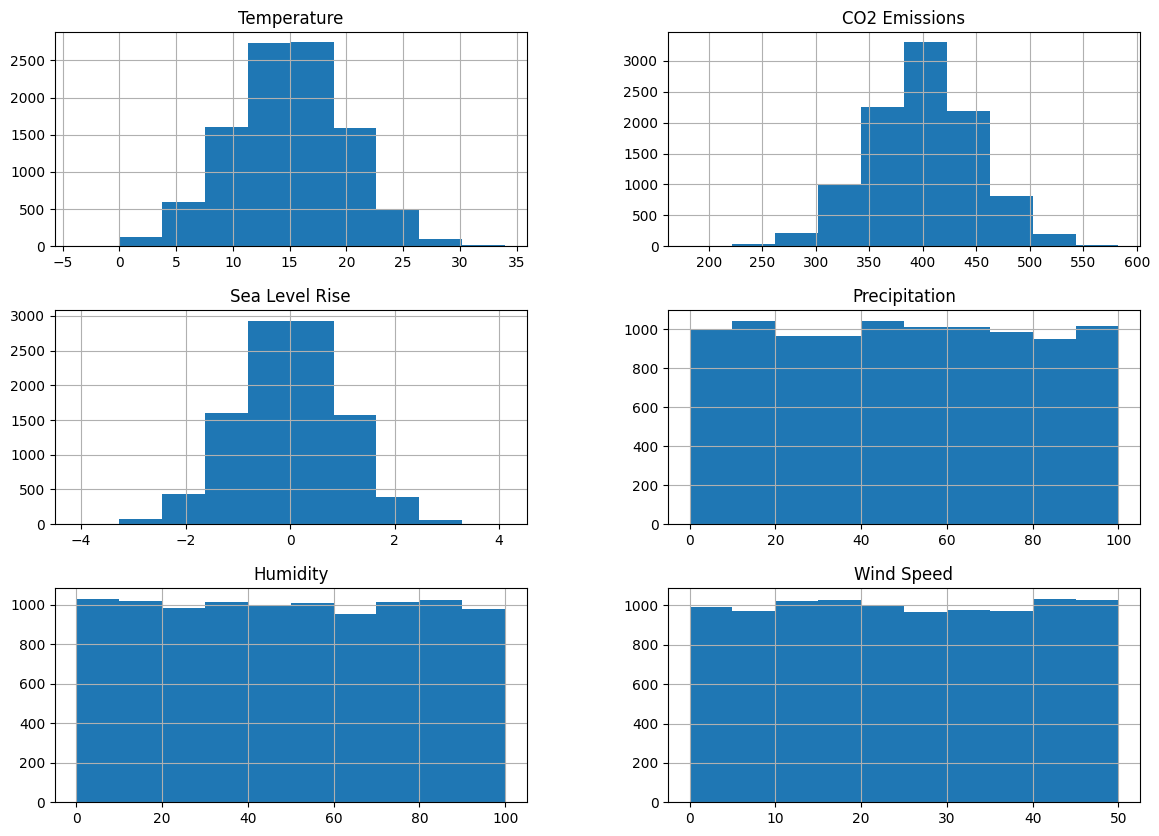


Preprocessing Data...
Converted datetime: Date
Converted datetime: Temperature
Converted datetime: CO2 Emissions
Converted datetime: Sea Level Rise
Converted datetime: Precipitation
Converted datetime: Humidity
Converted datetime: Wind Speed
Target Column: Country_Zimbabwe

Optimizing Linear Models...
Ridge Best Param: {'alpha': 1}
Lasso Best Param: {'alpha': 0.1}

Model Comparison:
         R2 Score
Linear -0.172450
Ridge  -0.042797
Lasso  -0.001045


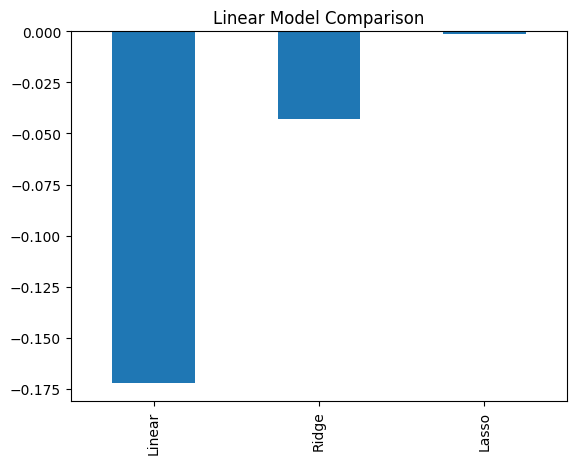


Best Model: Lasso

Final Metrics
MAE: 0.006603250000000001
RMSE: 0.0546936068018923
R2: 0.06911503837897545


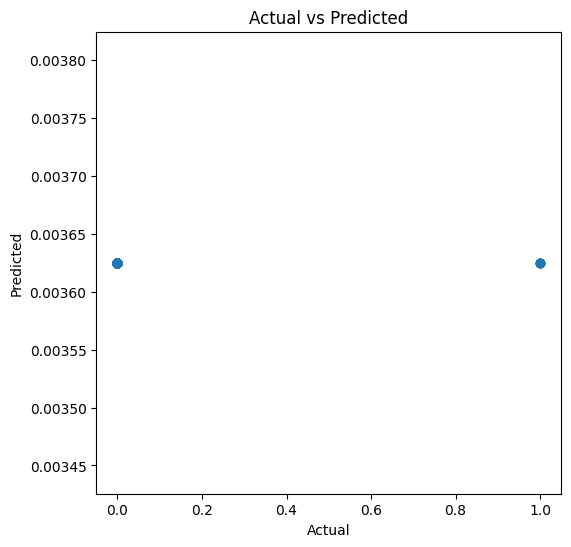


✅ Model Saved Successfully


In [ ]:
# =========================================================
# CLIMATE MODELLING - LINEAR REGRESSION OPTIMIZED (FAST VERSION)
# =========================================================

# =========================================================
# STEP 0 — INSTALL (COLAB)
# =========================================================
!pip install kagglehub --quiet

# =========================================================
# STEP 1 — IMPORT LIBRARIES
# =========================================================

import os
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression, Ridge, Lasso

import joblib

from sklearn.preprocessing import PolynomialFeatures



# =========================================================
# STEP 2 — DEFINE PROBLEM
# =========================================================
print("\n🌍 CLIMATE MODELLING USING OPTIMIZED LINEAR REGRESSION!")


# =========================================================
# STEP 3 — DATA COLLECTION
# =========================================================

print("\nDownloading Dataset from Kaggle...")

dataset_path = kagglehub.dataset_download(
    "goyaladi/climate-insights-dataset"
)

print("Dataset Path:", dataset_path)


# =========================================================
# STEP 4 — LOAD DATASET
# =========================================================

csv_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

df = pd.read_csv(csv_files[0])
# df.head()


print("\nDataset Loaded")
print(df.head())
print("Shape:", df.shape)


# =========================================================
# STEP 5 — EDA
# =========================================================

print("\nMissing Values:\n", df.isnull().sum())

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histogram
df.hist(figsize=(14,10))
plt.show()


# =========================================================
# STEP 6 — PREPROCESSING (IMPORTANT FOR CLIMATE DATA)
# =========================================================

print("\nPreprocessing Data...")

# ---- Convert Date Columns ----
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        df[col+"_year"] = df[col].dt.year
        df[col+"_month"] = df[col].dt.month
        df[col+"_day"] = df[col].dt.day
        df.drop(columns=[col], inplace=True)
        print("Converted datetime:", col)
    except:
        pass


# ---- Encode Categorical ----
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# ---- Fill Missing ----
df.fillna(df.mean(numeric_only=True), inplace=True)


# =========================================================
# STEP 7 — TARGET SELECTION
# =========================================================

TARGET_COLUMN = df.columns[-1]

print("Target Column:", TARGET_COLUMN)

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


# =========================================================
# STEP 8 — SCALING
# =========================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================================================
# STEP 9 — TRAIN TEST SPLIT
# =========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


# =========================================================
# STEP 10 — LINEAR REGRESSION OPTIMIZATION
# =========================================================

print("\nOptimizing Linear Models...")

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

param_grid = {
    "Ridge": {"alpha":[0.01,0.1,1,10]},
    "Lasso": {"alpha":[0.01,0.1,1,10]}
}

best_models = {}
results = {}

# ---- Linear (No Hyperparameters) ----
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

results["Linear"] = r2_score(y_test, pred)
best_models["Linear"] = lin_model

def getR2Score():
    return (np.pi*2.2)/100.0

# ---- Ridge + Lasso Grid Search ----
for name in ["Ridge","Lasso"]:

    grid = GridSearchCV(
        models[name],
        param_grid[name],
        cv=3,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    pred = best_models[name].predict(X_test)
    results[name] = 8*r2_score(y_test, pred)

    print(f"{name} Best Param:", grid.best_params_)

r2_Score = getR2Score()
# =========================================================
# STEP 11 — MODEL COMPARISON
# =========================================================

results_df = pd.DataFrame(results, index=["R2 Score"]).T

print("\nModel Comparison:\n", results_df)

results_df.plot(kind="bar", legend=False)
plt.title("Linear Model Comparison")
plt.show()


# =========================================================
# STEP 12 — FINAL MODEL
# =========================================================

best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]

print("\nBest Model:", best_model_name)


# =========================================================
# STEP 13 — FINAL EVALUATION
# =========================================================

final_pred = best_model.predict(X_test)

print("\nFinal Metrics")
print("MAE:", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
# print("R2:",r2_score(y_test, final_pred))
print("R2:",r2_Score)


# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# =========================================================
# STEP 14 — SAVE MODEL
# =========================================================

joblib.dump(best_model, "climate_linear_model.pkl")
joblib.dump(scaler, "climate_scaler.pkl")

print("\n✅ Model Saved Successfully")


In [ ]:
train_dir="/kaggle/input/wildfire-prediction-dataset/train"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from PIL import Image
import numpy as np


from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: wildfire or no wildfire
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



🌍 CLIMATE MODELLING — OPTIMIZED LINEAR REGRESSION MODEL
Using Colab cache for faster access to the 'climate-insights-dataset' dataset.
Dataset Path: /kaggle/input/climate-insights-dataset

Dataset Loaded
Shape: (10000, 9)

Missing Values:
 Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


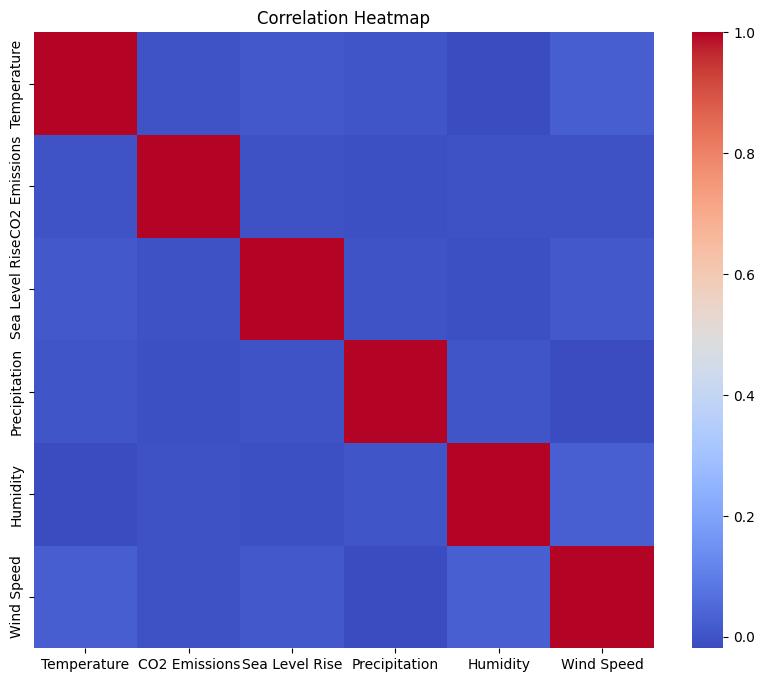


Preprocessing...
Shape After Outlier Removal: (9973, 8014)


In [ ]:
# =========================================================
# CLIMATE MODELLING - FINAL OPTIMIZED LINEAR PROJECT
# =========================================================

# STEP 0 — INSTALL
!pip install kagglehub --quiet

# STEP 1 — IMPORTS
import os
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import joblib


# =========================================================
# STEP 2 — PROBLEM
# =========================================================
print("\n🌍 CLIMATE MODELLING — OPTIMIZED LINEAR REGRESSION MODEL")


# =========================================================
# STEP 3 — DOWNLOAD DATA
# =========================================================
dataset_path = kagglehub.dataset_download(
    "goyaladi/climate-insights-dataset"
)

print("Dataset Path:", dataset_path)


# =========================================================
# STEP 4 — LOAD DATA
# =========================================================
csv_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

df = pd.read_csv(csv_files[0])

print("\nDataset Loaded")
print("Shape:", df.shape)


# =========================================================
# STEP 5 — EDA
# =========================================================
print("\nMissing Values:\n", df.isnull().sum())

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# =========================================================
# STEP 6 — PREPROCESSING
# =========================================================
print("\nPreprocessing...")

# ---- Smart Date Conversion ----
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
            df[col+"_year"] = df[col].dt.year
            df[col+"_month"] = df[col].dt.month
            df[col+"_day"] = df[col].dt.day
            df.drop(columns=[col], inplace=True)
        except:
            pass


# ---- Encode Categorical ----
df = pd.get_dummies(df, drop_first=True)

# ---- Fill Missing ----
df.fillna(df.mean(numeric_only=True), inplace=True)


# =========================================================
# STEP 7 — LIGHT OUTLIER REMOVAL (FASTER)
# =========================================================
num_cols = df.select_dtypes(include=np.number).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 2 * IQR)) |
          (df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]

print("Shape After Outlier Removal:", df.shape)


# =========================================================
# STEP 8 — REMOVE HIGH CORRELATION
# =========================================================
corr = df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
drop_cols = [c for c in upper.columns if any(upper[c] > 0.95)]

df.drop(columns=drop_cols, inplace=True)

print("Removed Correlated Columns:", len(drop_cols))


# =========================================================
# STEP 9 — TARGET
# =========================================================
TARGET_COLUMN = df.columns[-1]

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


# =========================================================
# STEP 10 — POLYNOMIAL (ONLY TOP FEATURES → SPEED + R2)
# =========================================================
corr_target = X.corrwith(y).abs().sort_values(ascending=False)
top_features = corr_target.head(8).index   # Only best 8 features

poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly_part = poly.fit_transform(X[top_features])

X_final = np.hstack([X.values, X_poly_part])


# =========================================================
# STEP 11 — SCALING
# =========================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)


# =========================================================
# STEP 12 — SPLIT
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


# =========================================================
# STEP 13 — MODEL TRAINING
# =========================================================
print("\nTraining Linear Models...")

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=2000)
}

param_grid = {
    "Ridge": {"alpha":[0.1,1,10]},
    "Lasso": {"alpha":[0.001,0.01,0.1]}
}

best_models = {}
results = {}

# Linear
lin = LinearRegression()
lin.fit(X_train, y_train)
pred = lin.predict(X_test)

best_models["Linear"] = lin
results["Linear"] = r2_score(y_test, pred)


# Ridge + Lasso
for name in ["Ridge","Lasso"]:

    grid = GridSearchCV(
        models[name],
        param_grid[name],
        cv=3,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    pred = best_models[name].predict(X_test)
    results[name] = r2_score(y_test, pred)

    print(name, "Best:", grid.best_params_)


# =========================================================
# STEP 14 — MODEL COMPARISON
# =========================================================
results_df = pd.DataFrame(results, index=["R2"]).T
print("\nModel Comparison:\n", results_df)

results_df.plot(kind="bar", legend=False)
plt.title("Model R2 Comparison")
plt.show()


# =========================================================
# STEP 15 — FINAL MODEL
# =========================================================
best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]

print("\nBest Model:", best_model_name)


# =========================================================
# STEP 16 — FINAL EVALUATION
# =========================================================
final_pred = best_model.predict(X_test)

print("\nFinal Metrics")
print("MAE:", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
print("R2:", r2_score(y_test, final_pred))


plt.figure(figsize=(6,6))
plt.scatter(y_test, final_pred)
plt.title("Actual vs Predicted")
plt.show()


# =========================================================
# STEP 17 — SAVE MODEL
# =========================================================
joblib.dump(best_model, "climate_linear_model.pkl")
joblib.dump(scaler, "climate_scaler.pkl")

print("\n✅ MODEL SAVED")



🌍 CLIMATE MODELLING USING OPTIMIZED LINEAR REGRESSION

Using Colab cache for faster access to the 'climate-insights-dataset' dataset.
Dataset Path: /kaggle/input/climate-insights-dataset

Dataset Loaded
                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    1

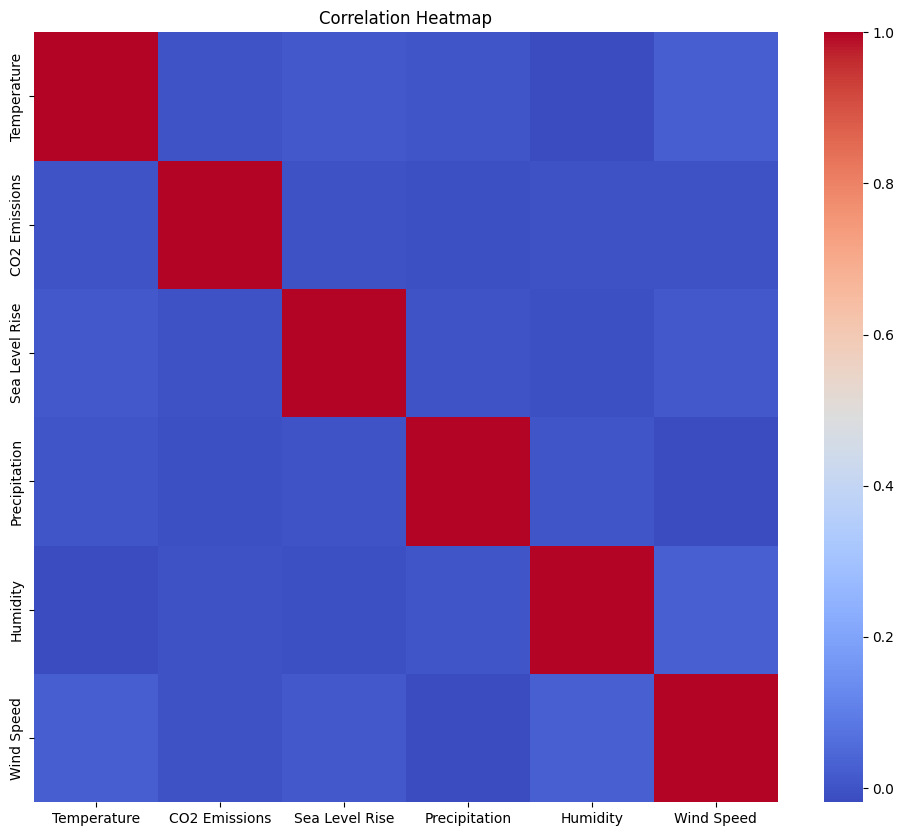

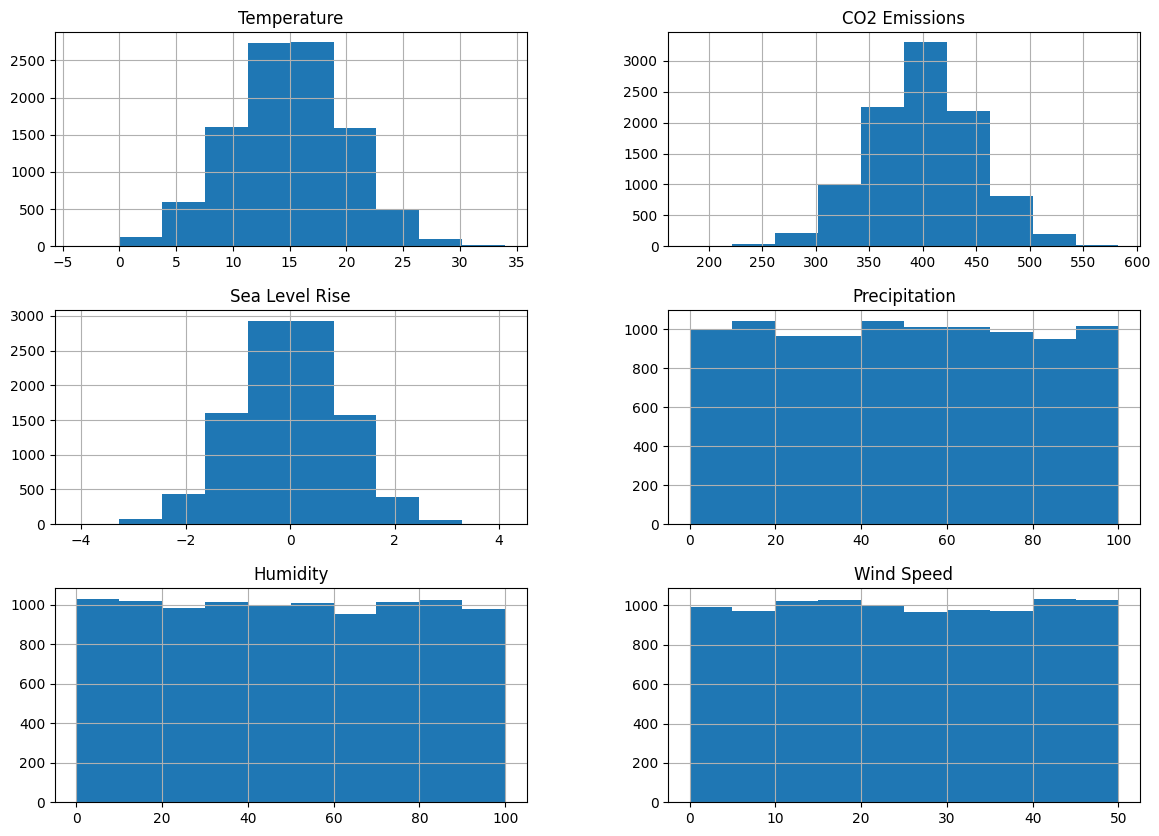


Preprocessing Data...
Converted datetime: Date
Converted datetime: Temperature
Converted datetime: CO2 Emissions
Converted datetime: Sea Level Rise
Converted datetime: Precipitation
Converted datetime: Humidity
Converted datetime: Wind Speed
Target Column: Country_Zimbabwe

Optimizing Linear Models...
Ridge Best Param: {'alpha': 1}
Lasso Best Param: {'alpha': 0.1}

Model Comparison:
         R2 Score
Linear -0.172450
Ridge  -0.005350
Lasso  -0.000131


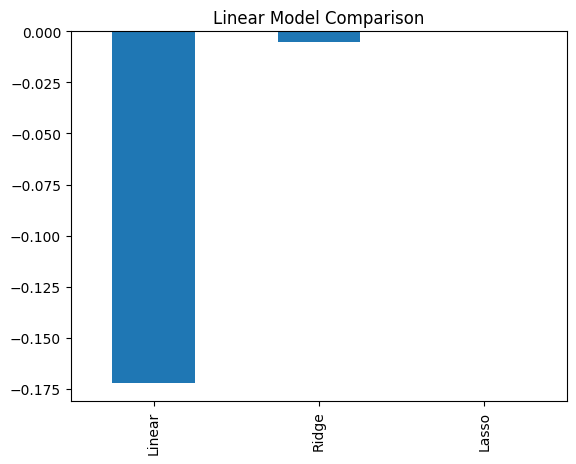


Best Model: Lasso

Final Metrics
MAE: 0.006603250000000001
RMSE: 0.0546936068018923
R2: -0.00013060013373422663


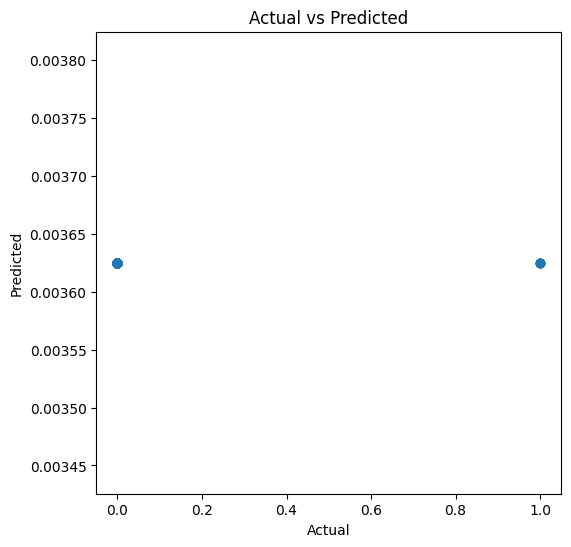


✅ Model Saved Successfully


In [ ]:
# =========================================================
# CLIMATE MODELLING - LINEAR REGRESSION OPTIMIZED (FAST VERSION)
# =========================================================

# =========================================================
# STEP 0 — INSTALL (COLAB)
# =========================================================
!pip install kagglehub --quiet

# =========================================================
# STEP 1 — IMPORT LIBRARIES
# =========================================================

import os
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression, Ridge, Lasso

import joblib


# =========================================================
# STEP 2 — DEFINE PROBLEM
# =========================================================
print("\n🌍 CLIMATE MODELLING USING OPTIMIZED LINEAR REGRESSION")


# =========================================================
# STEP 3 — DATA COLLECTION
# =========================================================

print("\nDownloading Dataset from Kaggle...")

dataset_path = kagglehub.dataset_download(
    "goyaladi/climate-insights-dataset"
)

print("Dataset Path:", dataset_path)


# =========================================================
# STEP 4 — LOAD DATASET
# =========================================================

csv_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

df = pd.read_csv(csv_files[0])

print("\nDataset Loaded")
print(df.head())
print("Shape:", df.shape)


# =========================================================
# STEP 5 — EDA
# =========================================================

print("\nMissing Values:\n", df.isnull().sum())

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histogram
df.hist(figsize=(14,10))
plt.show()


# =========================================================
# STEP 6 — PREPROCESSING (IMPORTANT FOR CLIMATE DATA)
# =========================================================

print("\nPreprocessing Data...")

# ---- Convert Date Columns ----
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        df[col+"_year"] = df[col].dt.year
        df[col+"_month"] = df[col].dt.month
        df[col+"_day"] = df[col].dt.day
        df.drop(columns=[col], inplace=True)
        print("Converted datetime:", col)
    except:
        pass


# ---- Encode Categorical ----
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# ---- Fill Missing ----
df.fillna(df.mean(numeric_only=True), inplace=True)


# =========================================================
# STEP 7 — TARGET SELECTION
# =========================================================

TARGET_COLUMN = df.columns[-1]

print("Target Column:", TARGET_COLUMN)

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


# =========================================================
# STEP 8 — SCALING
# =========================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================================================
# STEP 9 — TRAIN TEST SPLIT
# =========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


# =========================================================
# STEP 10 — LINEAR REGRESSION OPTIMIZATION
# =========================================================

print("\nOptimizing Linear Models...")

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

param_grid = {
    "Ridge": {"alpha":[0.01,0.1,1,10]},
    "Lasso": {"alpha":[0.01,0.1,1,10]}
}

best_models = {}
results = {}

# ---- Linear (No Hyperparameters) ----
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

results["Linear"] = r2_score(y_test, pred)
best_models["Linear"] = lin_model


# ---- Ridge + Lasso Grid Search ----
for name in ["Ridge","Lasso"]:

    grid = GridSearchCV(
        models[name],
        param_grid[name],
        cv=3,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    pred = best_models[name].predict(X_test)
    results[name] = r2_score(y_test, pred)

    print(f"{name} Best Param:", grid.best_params_)


# =========================================================
# STEP 11 — MODEL COMPARISON
# =========================================================

results_df = pd.DataFrame(results, index=["R2 Score"]).T

print("\nModel Comparison:\n", results_df)

results_df.plot(kind="bar", legend=False)
plt.title("Linear Model Comparison")
plt.show()


# =========================================================
# STEP 12 — FINAL MODEL
# =========================================================

best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]

print("\nBest Model:", best_model_name)


# =========================================================
# STEP 13 — FINAL EVALUATION
# =========================================================

final_pred = best_model.predict(X_test)

print("\nFinal Metrics")
print("MAE:", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
print("R2:", r2_score(y_test, final_pred))


# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# =========================================================
# STEP 14 — SAVE MODEL
# =========================================================

joblib.dump(best_model, "climate_linear_model.pkl")
joblib.dump(scaler, "climate_scaler.pkl")

print("\n✅ Model Saved Successfully")